Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading Data

In [7]:
x = pd.read_csv("/content/Bird Strikes data.xlsx - Bird Strikes.csv")
df = pd.DataFrame(x)
df.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,11/23/00 0:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,7/25/01 0:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,9/14/01 0:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,9/5/02 0:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,6/23/03 0:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No


Visualize Number of Bird Strikes over the years

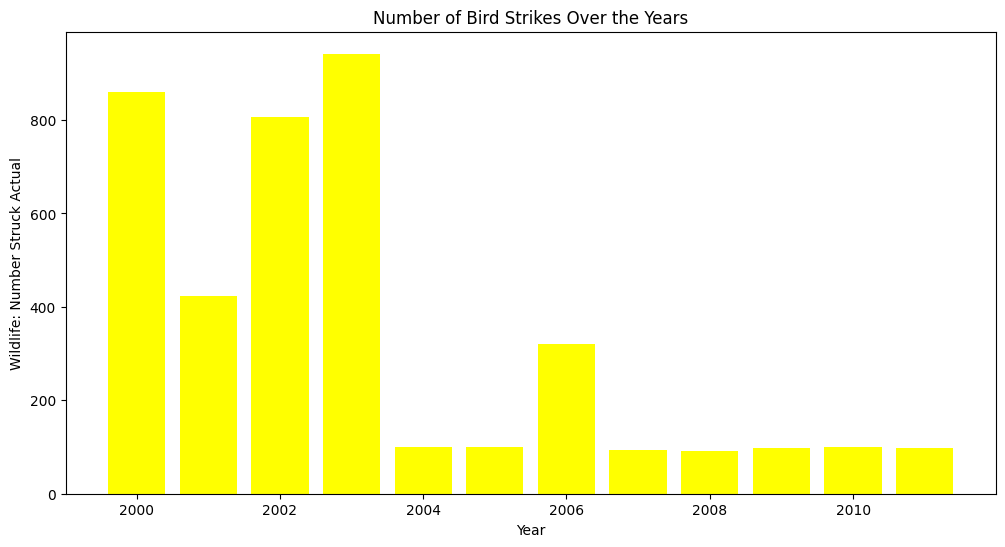

In [ ]:
df['Year'] = df['FlightDate'].dt.year
plt.figure(figsize=(12, 6))
plt.bar(df['Year'], df['Wildlife: Number Struck Actual'], color='yellow')
plt.xlabel('Year')
plt.ylabel('Wildlife: Number Struck Actual')
plt.title('Number of Bird Strikes Over the Years')
plt.show()

Yearly Analysis & Bird Strikes in the US

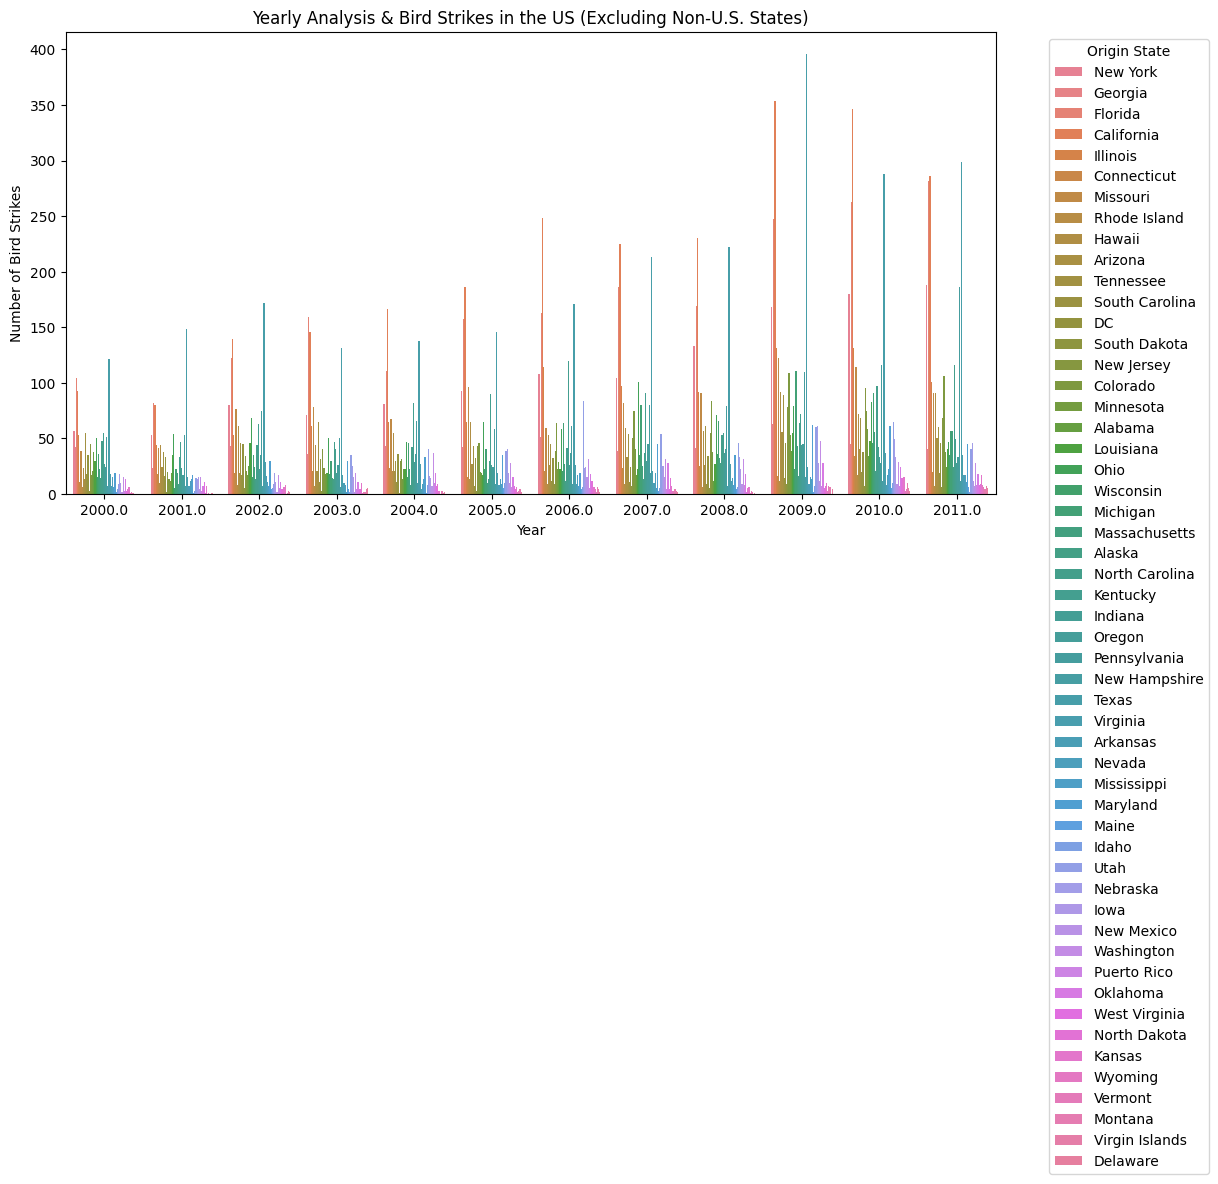

In [ ]:
df['FlightDate'] = pd.to_datetime(df['FlightDate'])
df['Year'] = df['FlightDate'].dt.year
non_us_states = ['Quebec', 'British Columbia', 'Prince Edward Island', 'Ontario',
                  'Newfoundland and Labrador', 'Alberta', 'Saskatchewan']

df_us = df[~df['Origin State'].isin(non_us_states)]


plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Origin State', data=df_us)
plt.title('Yearly Analysis & Bird Strikes in the US (Excluding Non-U.S. States)')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes')
plt.legend(title='Origin State', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Top 10 US Airlines in terms of having encountered bird strikes

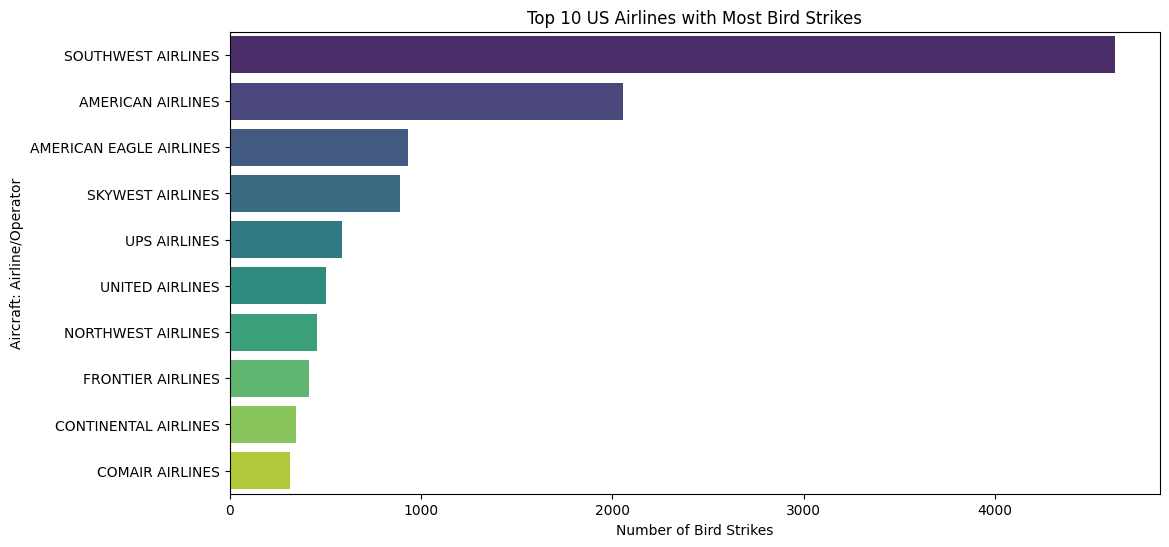

In [ ]:
df_us_airlines = df[df['Aircraft: Airline/Operator'].notna() & df['Aircraft: Airline/Operator'].str.contains('AIRLINES')]
plt.figure(figsize=(12, 6))
top_airlines = df_us_airlines['Aircraft: Airline/Operator'].value_counts().nlargest(10)
sns.barplot(x=top_airlines.values, y=top_airlines.index, hue=top_airlines.index, palette='viridis',legend=False)
plt.title('Top 10 US Airlines with Most Bird Strikes')
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Aircraft: Airline/Operator')
plt.show()

Airports with most incidents of bird strikes – Top 50

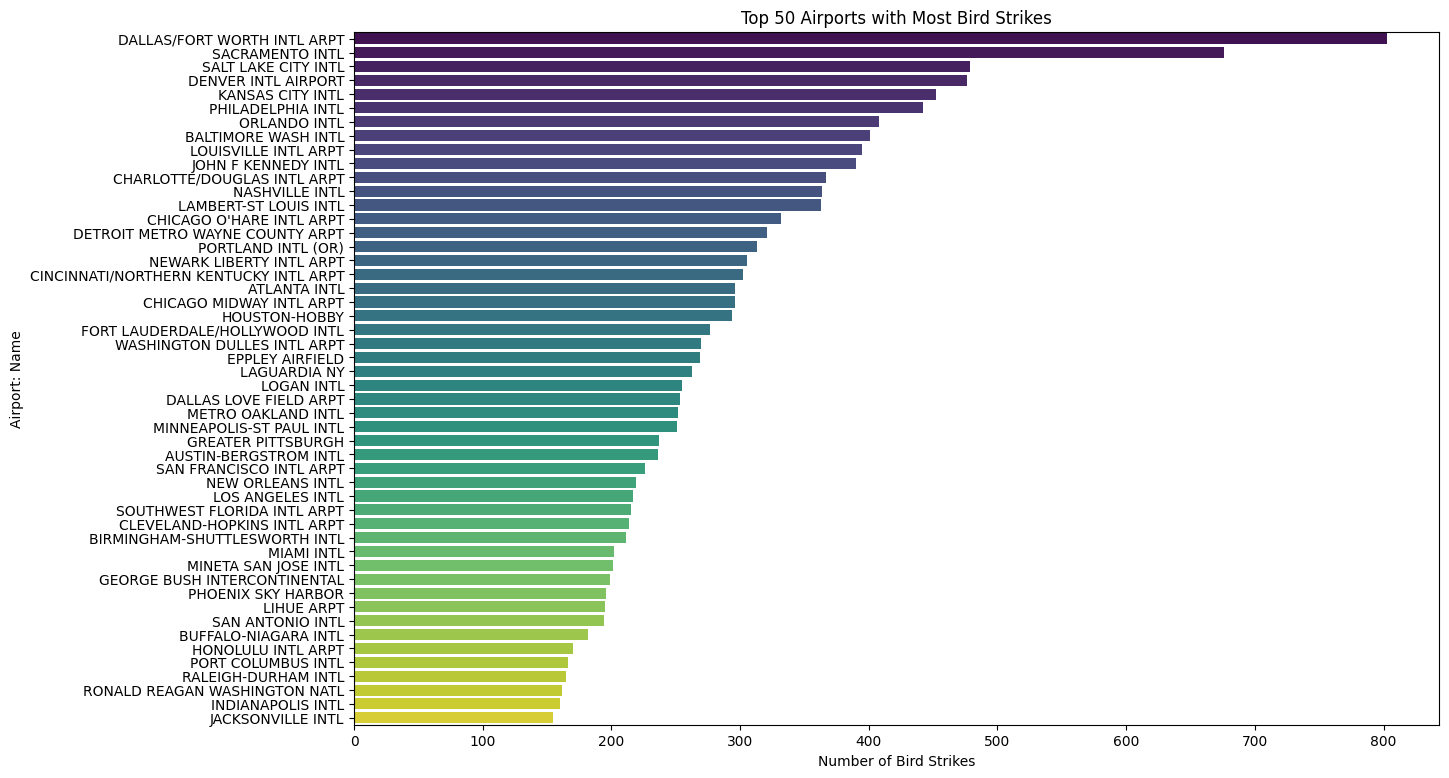

In [ ]:
plt.figure(figsize=(14, 9))
top_airports = df['Airport: Name'].value_counts().nlargest(50)
sns.barplot(x=top_airports.values, y=top_airports.index, hue=top_airports.index, palette='viridis', legend=False)
plt.title('Top 50 Airports with Most Bird Strikes')
plt.xlabel('Number of Bird Strikes')
plt.ylabel('Airport: Name')
plt.show()

Yearly Cost Incurred due to Bird Strikes:

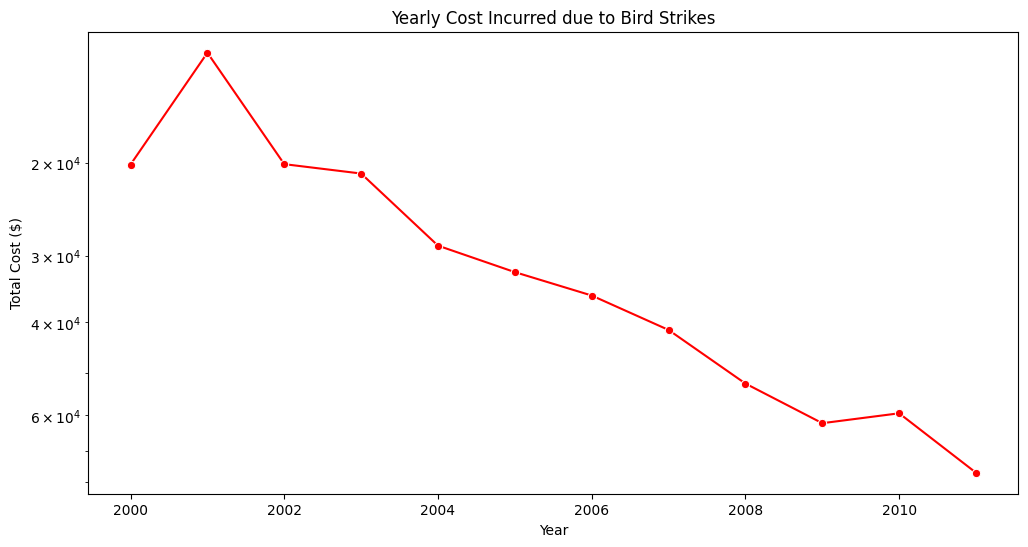

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Cost: Total $', data=df, estimator=sum, errorbar=None, marker='o', color='red')
plt.yscale('log')  # Using a logarithmic scale
plt.title('Yearly Cost Incurred due to Bird Strikes')
plt.xlabel('Year')
plt.ylabel('Total Cost ($)')
plt.show()

When do most bird strikes occur?

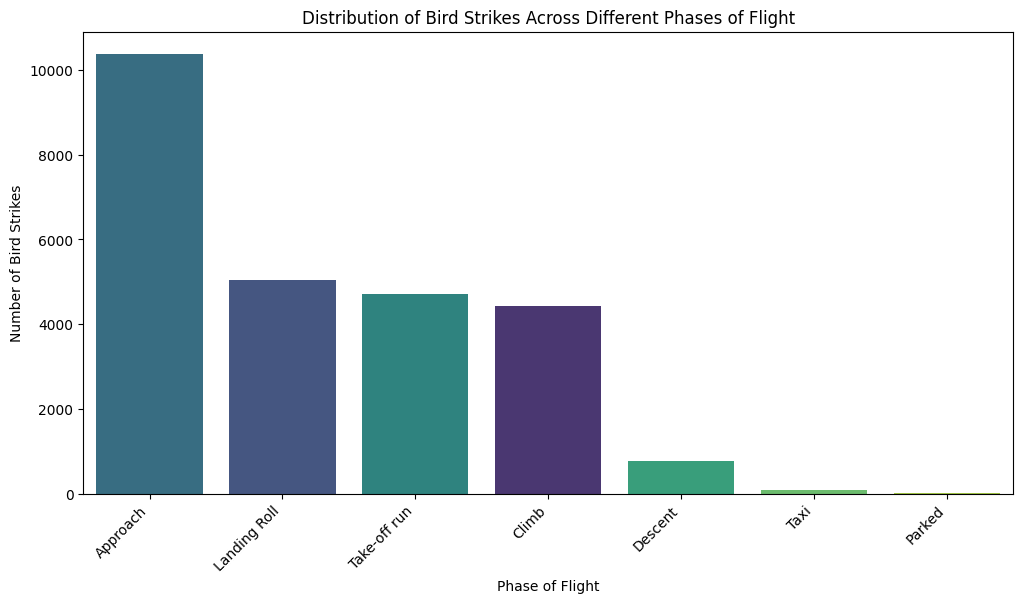

In [9]:
plt.figure(figsize=(12, 6))
sns.countplot(x='When: Phase of flight', hue='When: Phase of flight', data=df, order=df['When: Phase of flight'].value_counts().index, palette='viridis', legend=False)
plt.title('Distribution of Bird Strikes Across Different Phases of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')
plt.show()

Altitude of aeroplanes at the time of strike

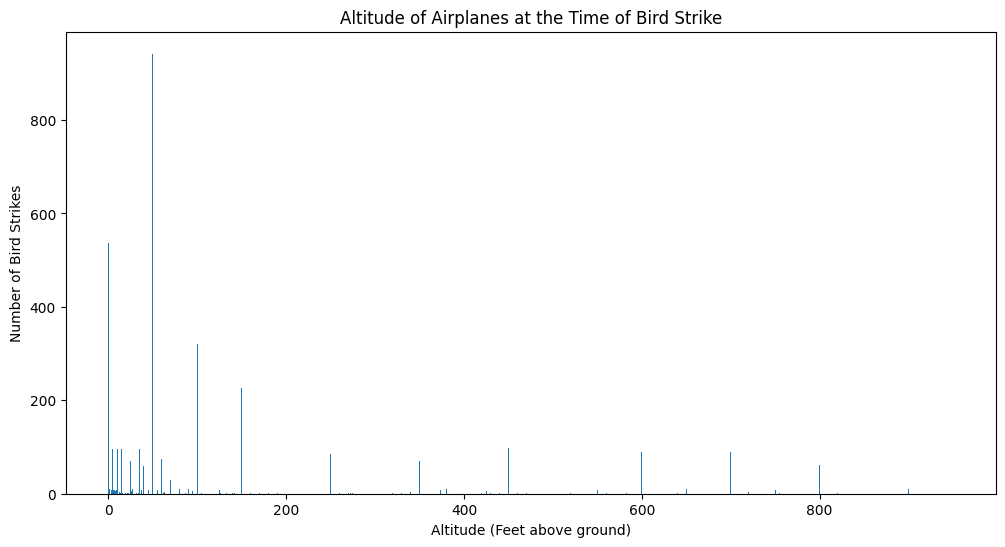

In [13]:
df['Feet above ground'] = pd.to_numeric(df['Feet above ground'], errors='coerce')
plt.figure(figsize=(12, 6))
plt.bar(df['Feet above ground'], df['Wildlife: Number Struck Actual'])
plt.title('Altitude of Airplanes at the Time of Bird Strike')
plt.xlabel('Altitude (Feet above ground)')
plt.ylabel('Number of Bird Strikes')
plt.show()

Phase of flight at the time of the strike.

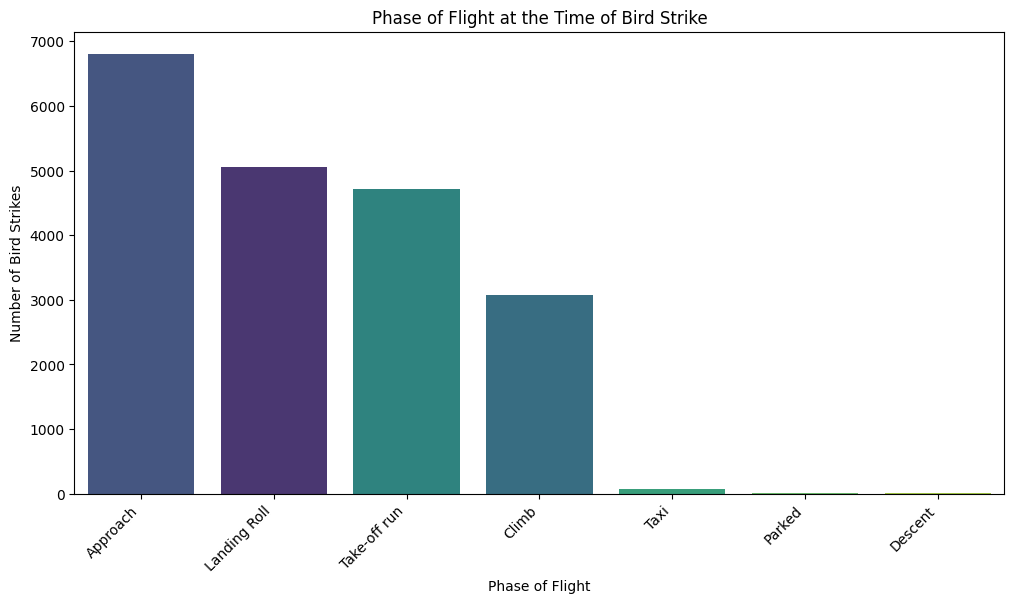

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(x='When: Phase of flight', hue='When: Phase of flight', data=df, order=df['When: Phase of flight'].value_counts().index, palette='viridis', legend=False)
plt.title('Phase of Flight at the Time of Bird Strike')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')
plt.show()

Average Altitude of the aeroplanes in different phases at the time of strike

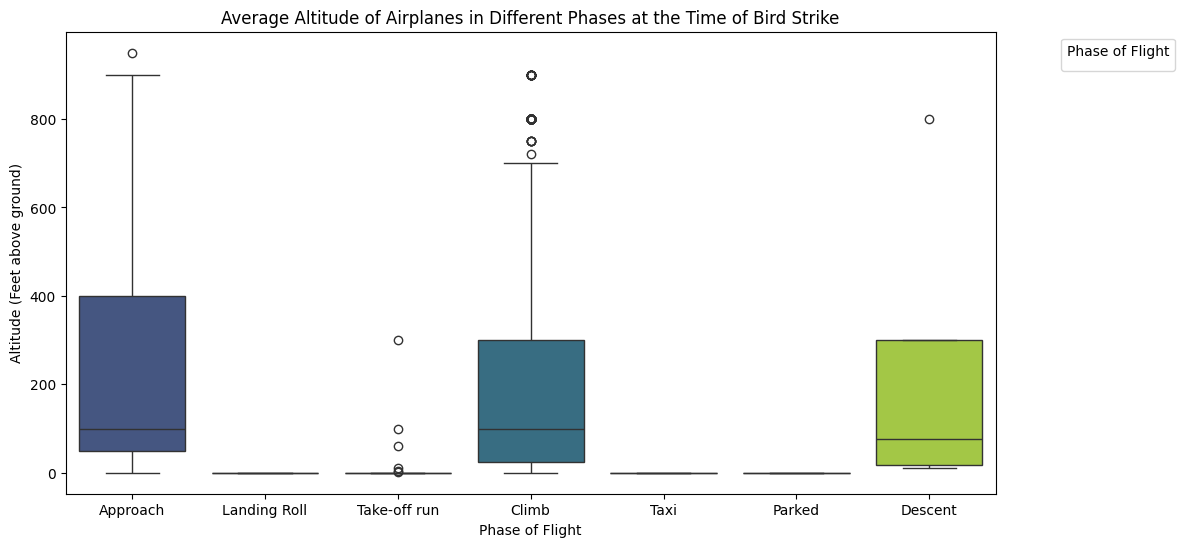

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='When: Phase of flight', y='Feet above ground', hue='When: Phase of flight', data=df, order=df['When: Phase of flight'].value_counts().index, palette='viridis',legend=False)
plt.title('Average Altitude of Airplanes in Different Phases at the Time of Bird Strike')
plt.xlabel('Phase of Flight')
plt.ylabel('Altitude (Feet above ground)')
plt.legend(title='Phase of Flight', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

Effect of Bird Strikes & Impact on Flight

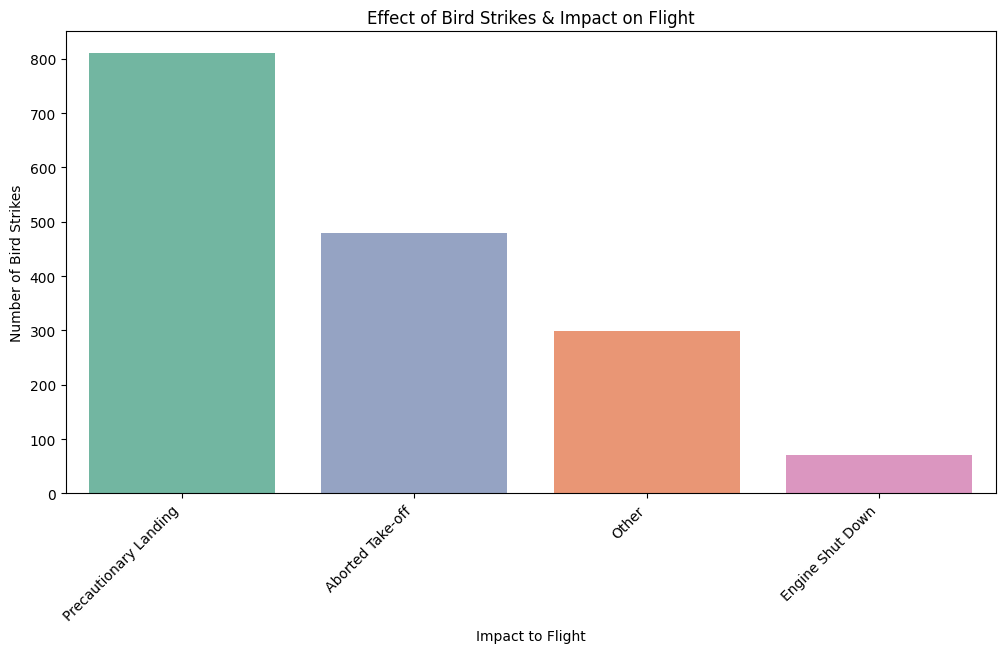

In [22]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Effect: Impact to flight', hue='Effect: Impact to flight', data=df, order=df['Effect: Impact to flight'].value_counts().index, palette='Set2', legend=False)
plt.title('Effect of Bird Strikes & Impact on Flight')
plt.xlabel('Impact to Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')
plt.show()

Effect of Strike at Different Altitude

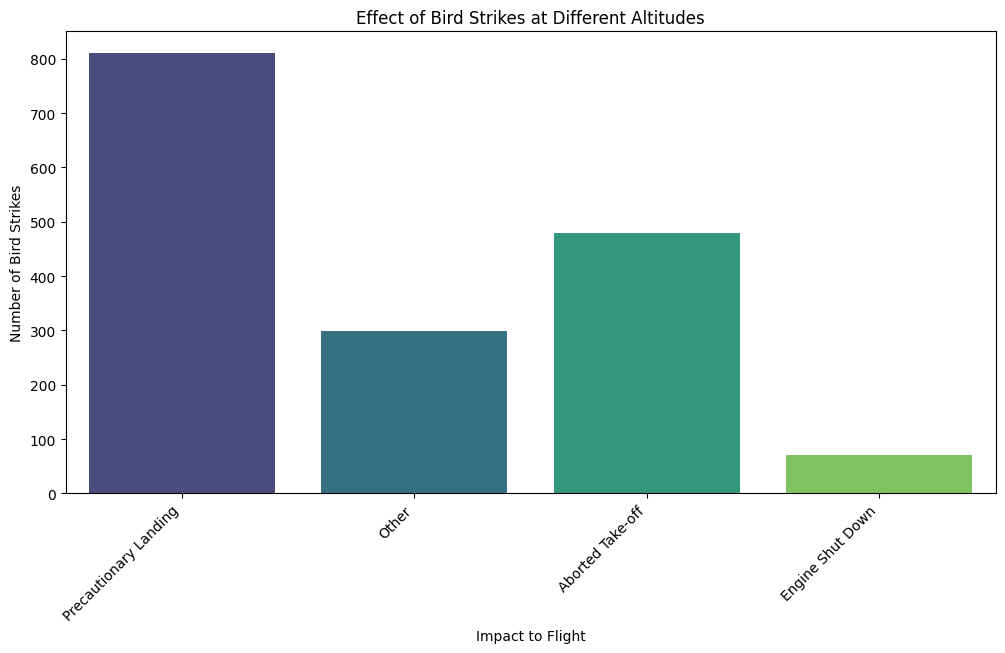

In [27]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Effect: Impact to flight', hue='Effect: Impact to flight', data=df, palette='viridis', legend=False)
plt.title('Effect of Bird Strikes at Different Altitudes')
plt.xlabel('Impact to Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')
plt.show()


Were Pilots Informed? & Prior Warning and Effect of Strike Relation

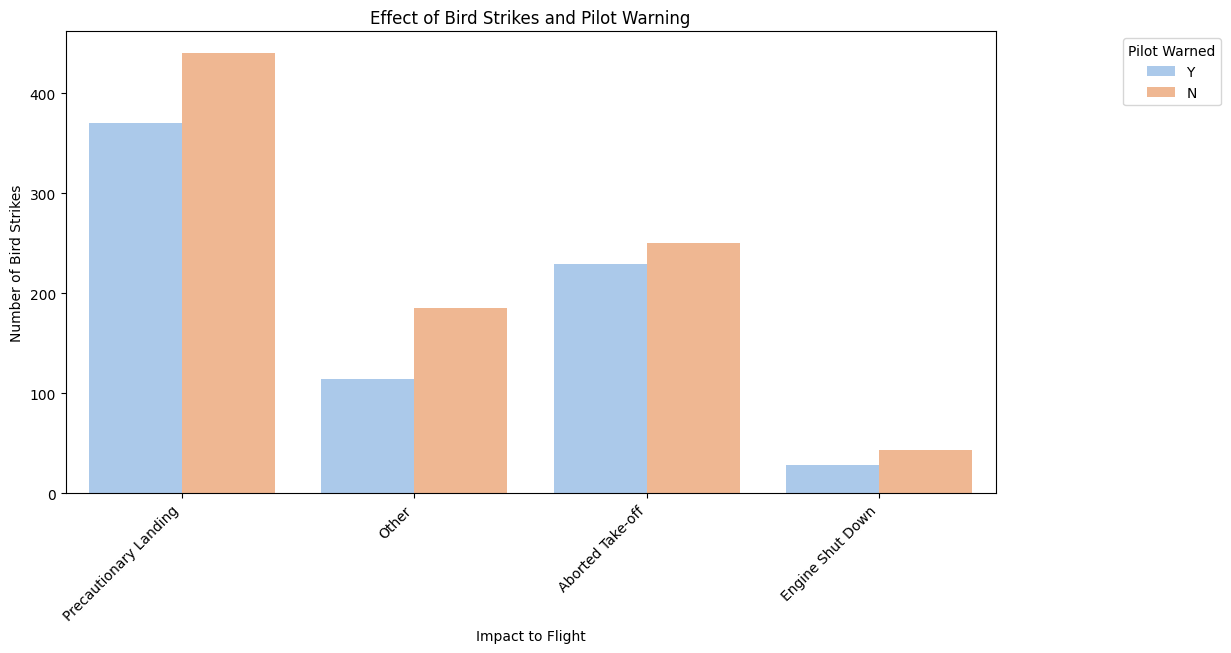

In [28]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Effect: Impact to flight', hue='Pilot warned of birds or wildlife?', data=df, palette='pastel')
plt.title('Effect of Bird Strikes and Pilot Warning')
plt.xlabel('Impact to Flight')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Pilot Warned', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

Modular Format

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

In [46]:
def visualize_number_of_strikes_over_years(df):
    df['Year'] = df['FlightDate'].dt.year
    plt.figure(figsize=(12, 6))
    plt.bar(df['Year'], df['Wildlife: Number Struck Actual'], color='yellow')
    plt.xlabel('Year')
    plt.ylabel('Wildlife: Number Struck Actual')
    plt.title('Number of Bird Strikes Over the Years')
    plt.show()

In [48]:
def yearly_analysis_and_strikes_in_us(df):
    df['FlightDate'] = pd.to_datetime(df['FlightDate'])
    df['Year'] = df['FlightDate'].dt.year
    non_us_states = ['Quebec', 'British Columbia', 'Prince Edward Island', 'Ontario','Newfoundland and Labrador', 'Alberta', 'Saskatchewan']
    df_us = df[~df['Origin State'].isin(non_us_states)]
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Year', hue='Origin State', data=df_us)
    plt.title('Yearly Analysis & Bird Strikes in the US (Excluding Non-U.S. States)')
    plt.xlabel('Year')
    plt.ylabel('Number of Bird Strikes')
    plt.legend(title='Origin State', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

In [47]:
def top_us_airlines_with_most_strikes(df):
    df_us_airlines = df[df['Aircraft: Airline/Operator'].notna() & df['Aircraft: Airline/Operator'].str.contains('AIRLINES')]
    plt.figure(figsize=(12, 6))
    top_airlines = df_us_airlines['Aircraft: Airline/Operator'].value_counts().nlargest(10)
    sns.barplot(x=top_airlines.values, y=top_airlines.index, hue=top_airlines.index, palette='viridis',legend=False)
    plt.title('Top 10 US Airlines with Most Bird Strikes')
    plt.xlabel('Number of Bird Strikes')
    plt.ylabel('Aircraft: Airline/Operator')
    plt.show()

In [50]:
def top_airports_with_most_incidents(df):
    plt.figure(figsize=(14, 9))
    top_airports = df['Airport: Name'].value_counts().nlargest(50)
    sns.barplot(x=top_airports.values, y=top_airports.index, hue=top_airports.index, palette='viridis', legend=False)
    plt.title('Top 50 Airports with Most Bird Strikes')
    plt.xlabel('Number of Bird Strikes')
    plt.ylabel('Airport: Name')
    plt.show()

In [51]:
def yearly_cost_incurred_due_to_strikes(df):
  plt.figure(figsize=(12, 6))
  sns.lineplot(x='Year', y='Cost: Total $', data=df, estimator=sum, errorbar=None, marker='o', color='red')
  plt.yscale('log')  # Using a logarithmic scale
  plt.title('Yearly Cost Incurred due to Bird Strikes')
  plt.xlabel('Year')
  plt.ylabel('Total Cost ($)')
  plt.show()

In [52]:
def bird_strikes_distribution_across_phases(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(x='When: Phase of flight', hue='When: Phase of flight', data=df, order=df['When: Phase of flight'].value_counts().index, palette='viridis', legend=False)
    plt.title('Distribution of Bird Strikes Across Different Phases of Flight')
    plt.xlabel('Phase of Flight')
    plt.ylabel('Number of Bird Strikes')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [53]:
def altitude_of_airplanes_at_time_of_strike(df):
    df['Feet above ground'] = pd.to_numeric(df['Feet above ground'], errors='coerce')
    plt.figure(figsize=(12, 6))
    plt.bar(df['Feet above ground'], df['Wildlife: Number Struck Actual'])
    plt.title('Altitude of Airplanes at the Time of Bird Strike')
    plt.xlabel('Altitude (Feet above ground)')
    plt.ylabel('Number of Bird Strikes')
    plt.show()

In [54]:
def phase_of_flight_at_time_of_strike(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(x='When: Phase of flight', hue='When: Phase of flight', data=df, order=df['When: Phase of flight'].value_counts().index, palette='viridis', legend=False)
    plt.title('Phase of Flight at the Time of Bird Strike')
    plt.xlabel('Phase of Flight')
    plt.ylabel('Number of Bird Strikes')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [55]:
def average_altitude_of_airplanes_in_different_phases(df):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='When: Phase of flight', y='Feet above ground', hue='When: Phase of flight', data=df, order=df['When: Phase of flight'].value_counts().index, palette='viridis',legend=False)
    plt.title('Average Altitude of Airplanes in Different Phases at the Time of Bird Strike')
    plt.xlabel('Phase of Flight')
    plt.ylabel('Altitude (Feet above ground)')
    plt.legend(title='Phase of Flight', loc='upper right', bbox_to_anchor=(1.2, 1))
    plt.show()

In [57]:
def effect_of_bird_strikes_and_impact_on_flight(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Effect: Impact to flight', hue='Effect: Impact to flight', data=df, order=df['Effect: Impact to flight'].value_counts().index, palette='Set2', legend=False)
    plt.title('Effect of Bird Strikes & Impact on Flight')
    plt.xlabel('Impact to Flight')
    plt.ylabel('Number of Bird Strikes')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [58]:
def effect_of_strike_at_different_altitude(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Effect: Impact to flight', hue='Effect: Impact to flight', data=df, palette='viridis', legend=False)
    plt.title('Effect of Bird Strikes at Different Altitudes')
    plt.xlabel('Impact to Flight')
    plt.ylabel('Number of Bird Strikes')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [59]:
def pilot_warning_and_effect_of_strike_relation(df):
    plt.figure(figsize=(12, 6))
    sns.countplot(x='Effect: Impact to flight', hue='Pilot warned of birds or wildlife?', data=df, palette='pastel')
    plt.title('Effect of Bird Strikes and Pilot Warning')
    plt.xlabel('Impact to Flight')
    plt.ylabel('Number of Bird Strikes')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Pilot Warned', loc='upper right', bbox_to_anchor=(1.25, 1))
    plt.show()

In [44]:
file_path = "Bird Strikes data.xlsx - Bird Strikes.csv"
bird_strikes_df = load_data(file_path)

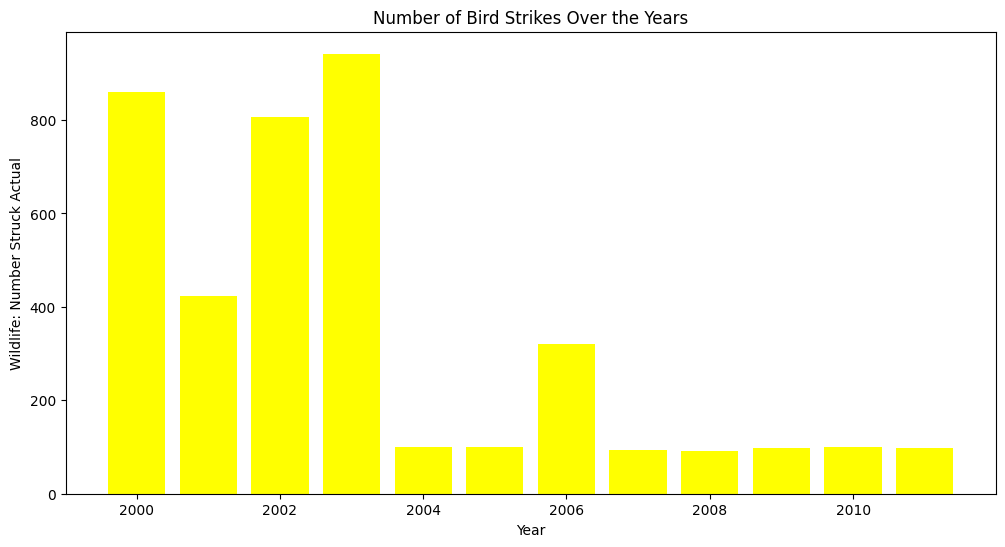

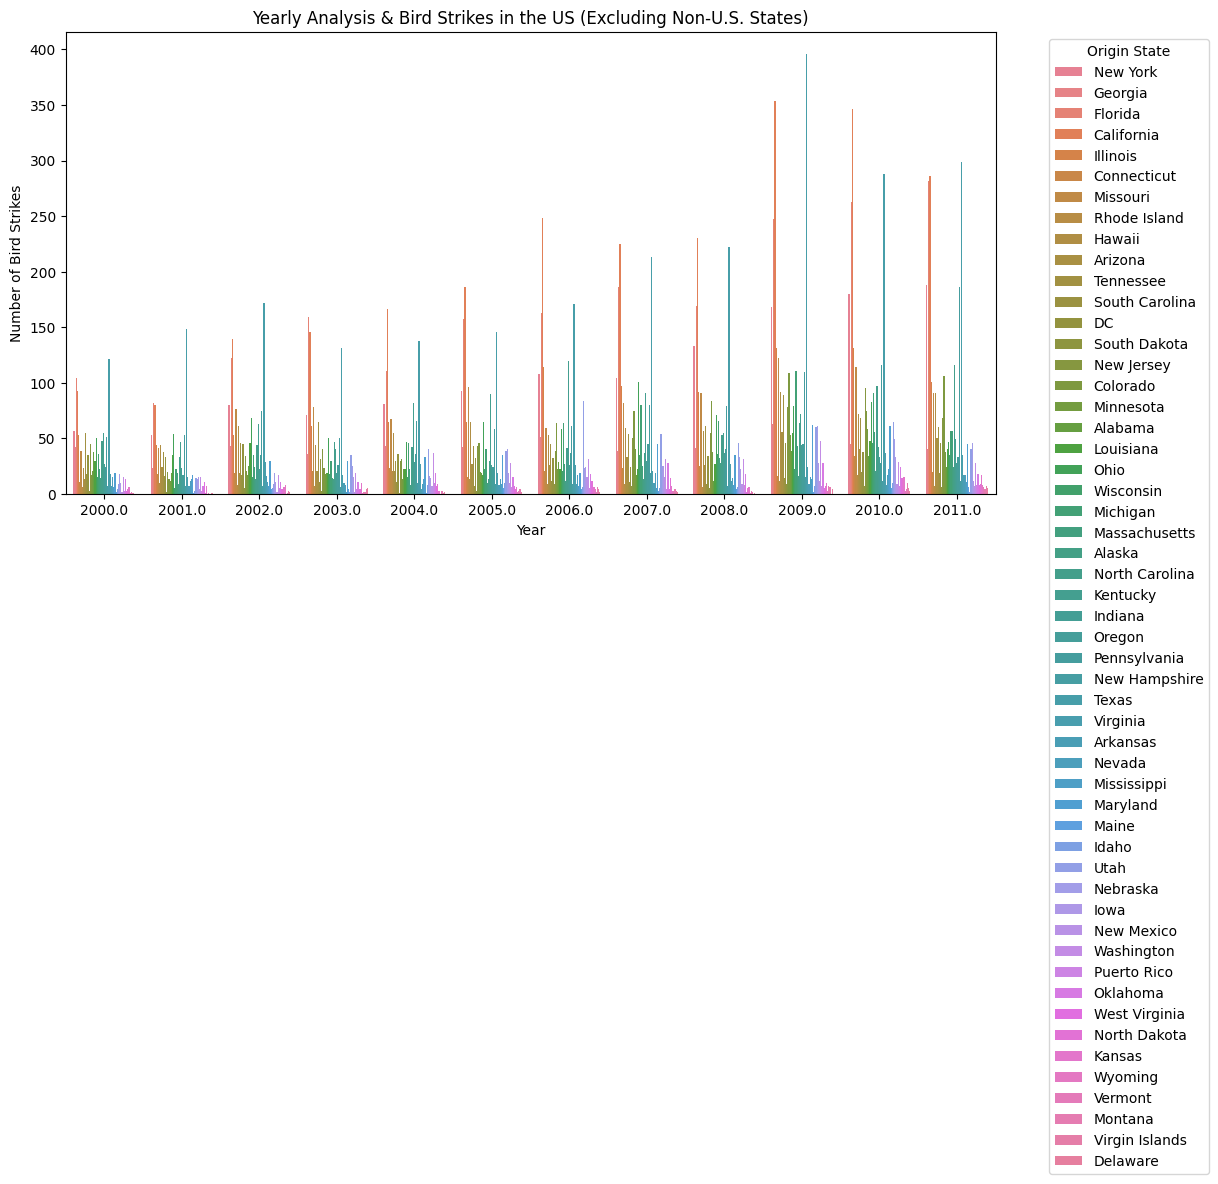

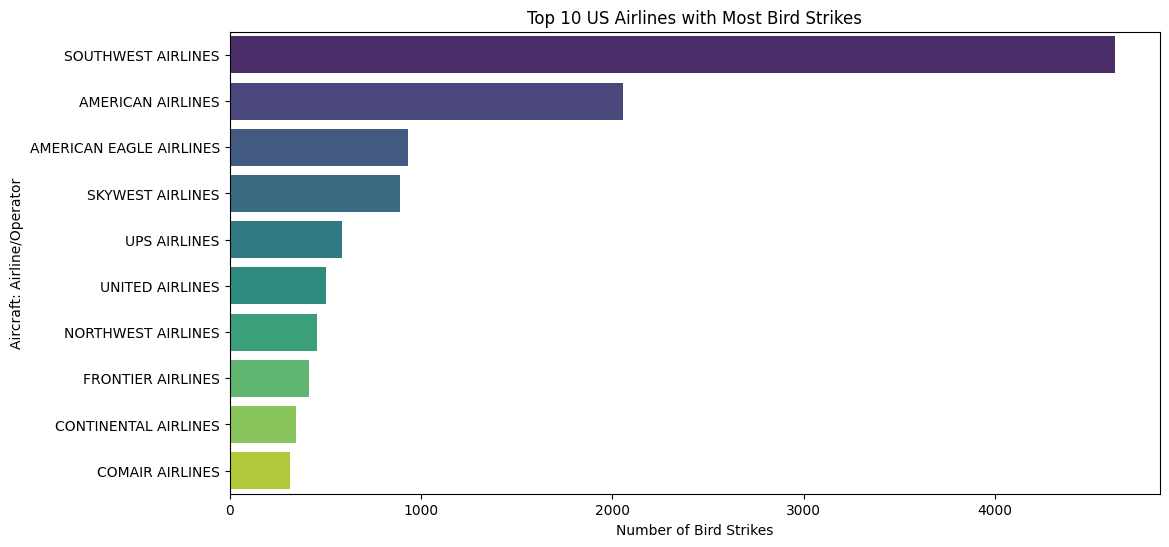

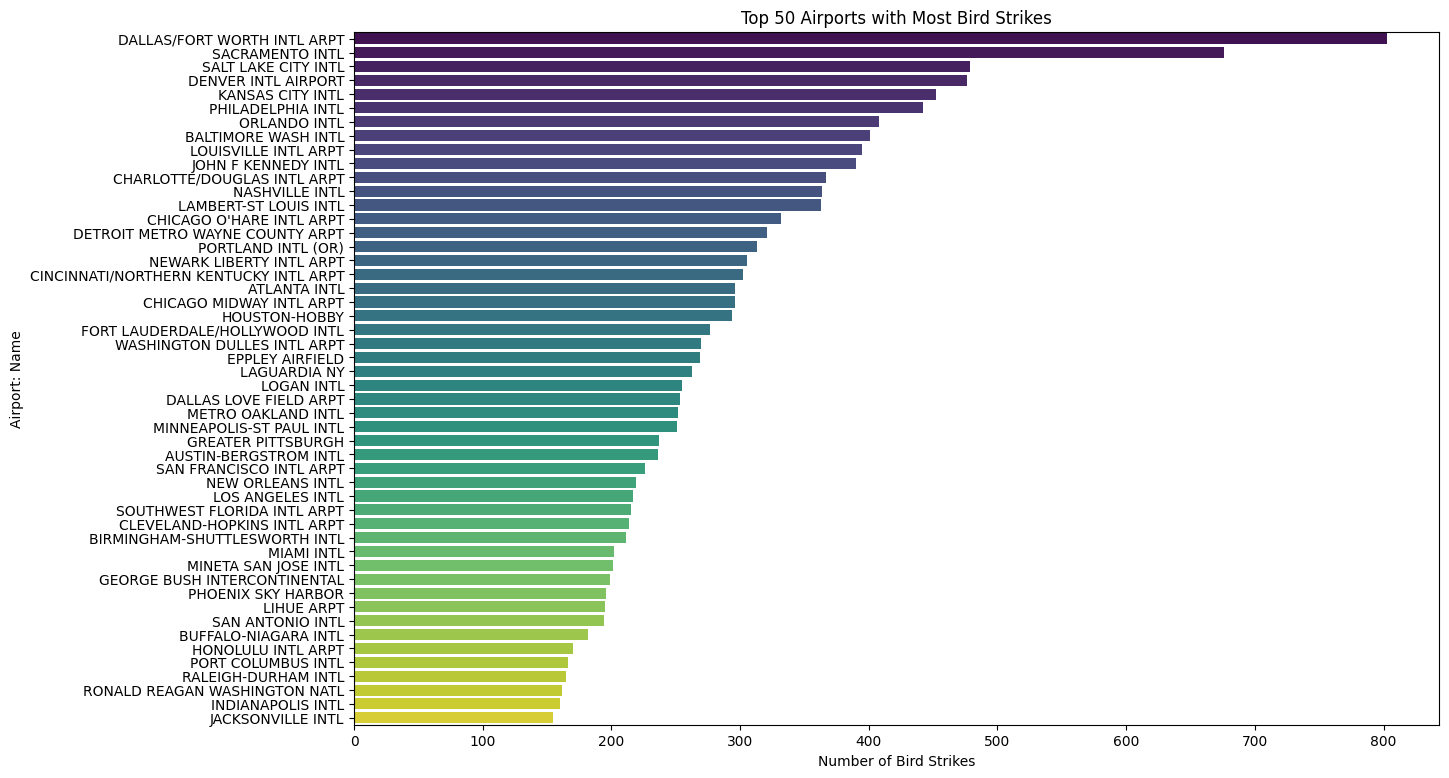

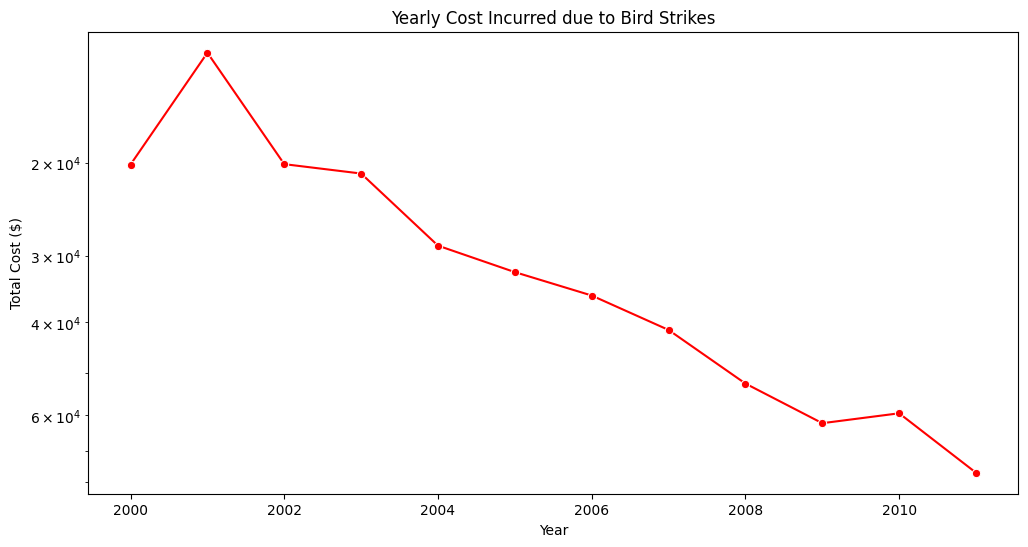

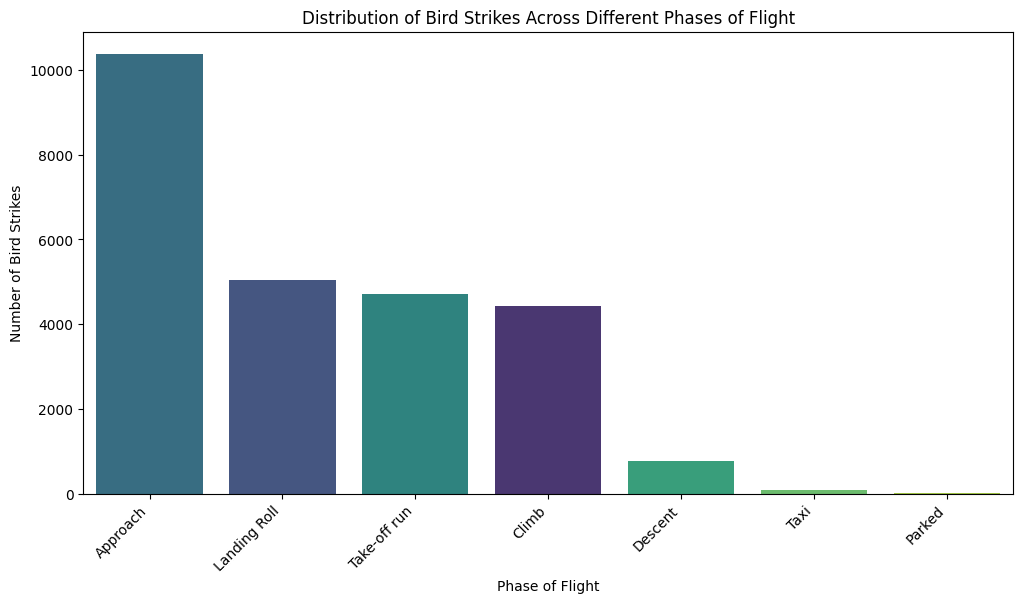

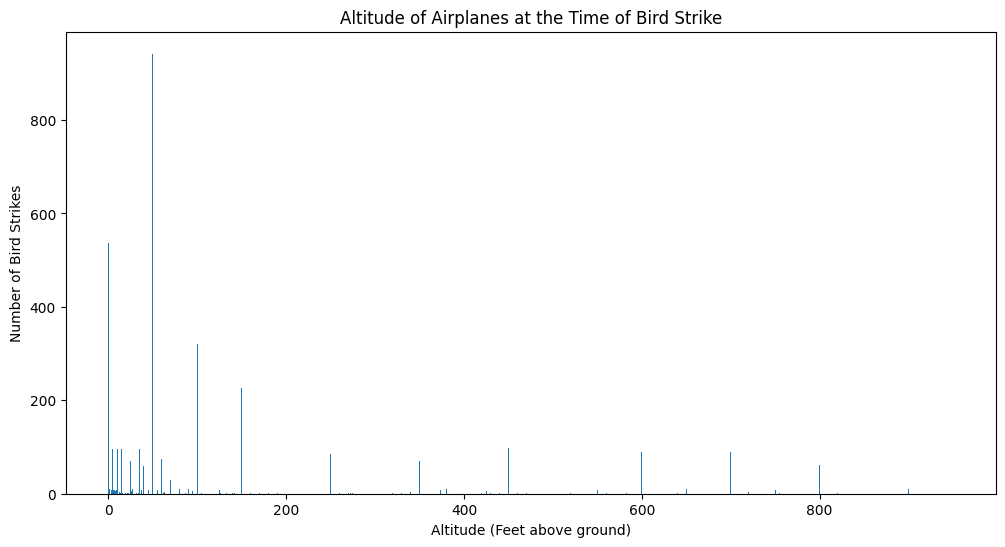

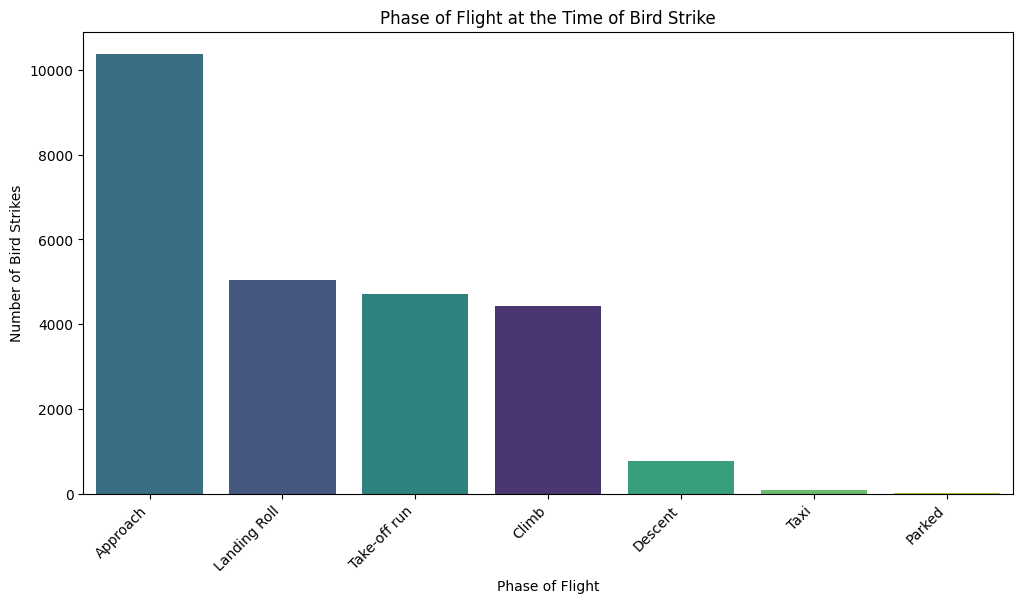

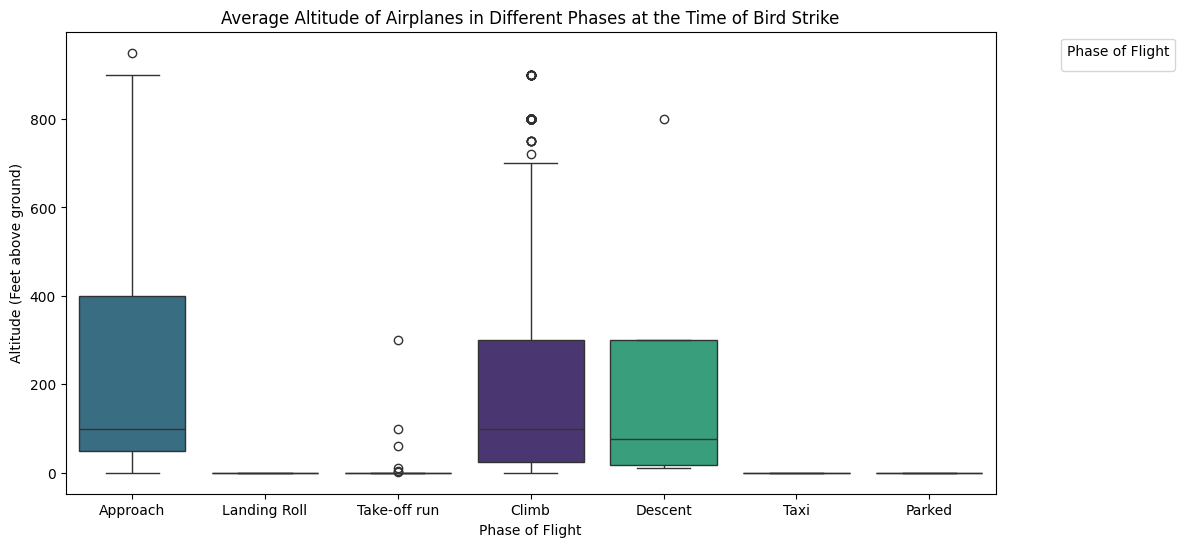

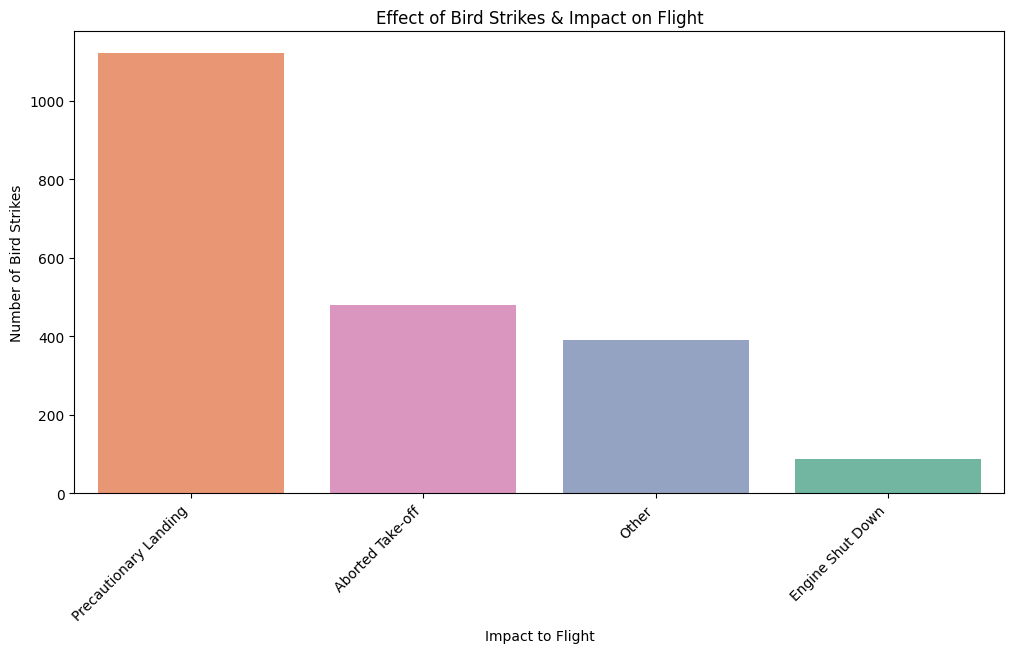

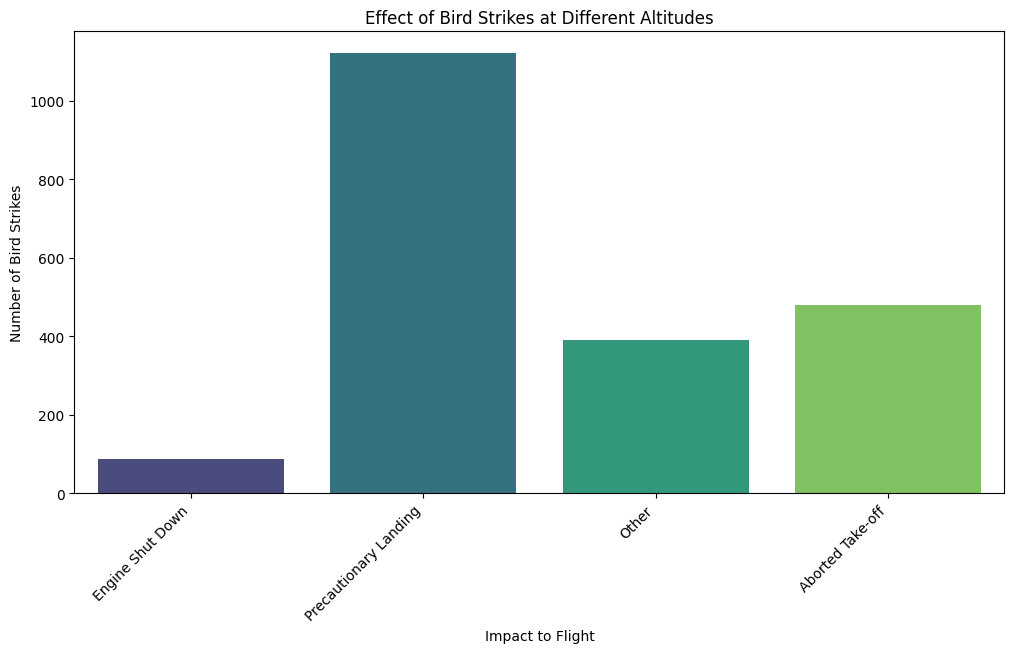

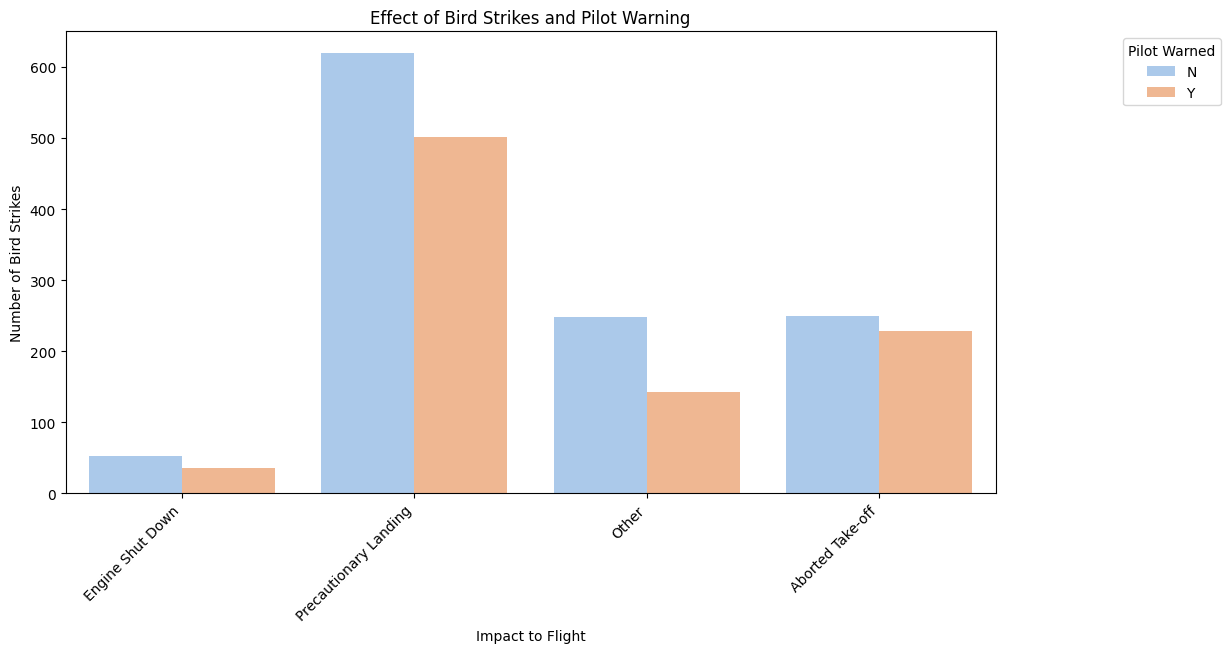

In [60]:
visualize_number_of_strikes_over_years(bird_strikes_df)
yearly_analysis_and_strikes_in_us(bird_strikes_df)
top_us_airlines_with_most_strikes(bird_strikes_df)
top_airports_with_most_incidents(bird_strikes_df)
yearly_cost_incurred_due_to_strikes(bird_strikes_df)
bird_strikes_distribution_across_phases(bird_strikes_df)
altitude_of_airplanes_at_time_of_strike(bird_strikes_df)
phase_of_flight_at_time_of_strike(bird_strikes_df)
average_altitude_of_airplanes_in_different_phases(bird_strikes_df)
effect_of_bird_strikes_and_impact_on_flight(bird_strikes_df)
effect_of_strike_at_different_altitude(bird_strikes_df)
pilot_warning_and_effect_of_strike_relation(bird_strikes_df)